# Task 4.9: Intro to Data Visualization with Python, part 1

## Standard prerequisites.  Now with additional libraries seaborn, matplotlib, and scipy.

In [54]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [55]:
# Starting with Exercise 4.7, import additional libraries I've discovered thanks to Lubov, especially the time library.
import time
import string
import random

In [56]:
# Set a PATH variable.

In [57]:
# Linux PATH - Sadly, my Linux system with 8GB of total RAM could not import the new df_ords_prior DataFrame.
# BUT, now I have moved again, to an AWS EC2 instance that should be able to handle this.

In [58]:
## path = (r'~/careerfoundry/tasks/data-immersion/Achievement4/Instacart-Basket-Analysis')

### # Oh, wow, matplotlib.pyplot.savefig function does not expand the tilde (~) reference in directory paths.  LAME. :(

In [59]:
path = (r'/home/ubuntu/careerfoundry/tasks/data-immersion/Achievement4/Instacart-Basket-Analysis')

In [60]:
# windoze PATH - The windoze laptop I bought for Excel and Tableau also has 16GB of RAM, so I migrated there.

In [61]:
## path = (r'C:\Users\emccc\OneDrive\Documents\CareerFoundry\Achievement-4\Instacart-Basket-Analysis')

# I unzipped the customers.zip file to find the payload is a .CSV file, customers.csv.  I'll read it as df_cust.

In [62]:
df_cust = pd.read_csv(os.path.join(path, '02-Data', 'Original-Data', 'customers.csv'), index_col = False)

In [63]:
# Some quick exploration of this new dataframe.  WHAT'S UP WITH THE NEAR-PERFECTLY EVEN DISTRIBUTIONS??

In [64]:
df_cust.shape

(206209, 10)

In [65]:
df_cust.head(1)

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665


In [66]:
df_cust.describe()

,user_id,Age,n_dependants,income
count,206209.000000,206209.000000,206209.000000,206209.000000
mean,103105.000000,49.501646,1.499823,94632.852548
std,59527.555167,18.480962,1.118433,42473.786988
min,1.000000,18.000000,0.000000,25903.000000
25%,51553.000000,33.000000,0.000000,59874.000000
50%,103105.000000,49.000000,1.000000,93547.000000
75%,154657.000000,66.000000,3.000000,124244.000000
max,206209.000000,81.000000,3.000000,593901.000000


In [67]:
# Rename columns for consistency.  We're clearly in the U.S., so let's use the U.S. spelling of "dependents."

In [68]:
df_cust.rename(columns = {'First Name' : 'given_name', 'Surnam' : 'family_name' , 'Gender' : 'gender' , 'STATE' : 'state' , 'Age' : 'age' , 'n_dependants' : 'num_dependents' , 'user_id' : 'customer_id'}, inplace = True)

In [69]:
# Check the new column names.
# NB:  I PREFER NOT TO DROP ANY COLUMNS BEFORE COMPLETING THE TASK.  MAYBE EVEN FIRST NAMES AND LAST NAMES WILL
# YIELD SOMETHING INTERESTING.

In [70]:
df_cust.head(1)

,customer_id,given_name,family_name,gender,state,age,date_joined,num_dependents,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665


In [71]:
# Check state names for consistency.  In real life I would likely want to confirm spelling and/or replace full
# names with two-letter abbreviations, and there is probably a library for precisely that purpose, but for this
# task I'll just check that there are no more than fifty unique values.

In [72]:
len(list(df_cust['state'].unique()))

51

In [73]:
df_cust['state'].unique()

array(['Missouri', 'New Mexico', 'Idaho', 'Iowa', 'Maryland', 'Kentucky',
       'Montana', 'South Carolina', 'Texas', 'Virginia', 'Nevada',
       'Nebraska', 'Georgia', 'Wyoming', 'Colorado', 'North Dakota',
       'Wisconsin', 'Alaska', 'Vermont', 'Arkansas', 'Maine',
       'North Carolina', 'West Virginia', 'Indiana', 'Oregon', 'Florida',
       'California', 'Pennsylvania', 'Ohio', 'Connecticut', 'Arizona',
       'Louisiana', 'Washington', 'New York', 'Mississippi', 'Oklahoma',
       'Utah', 'New Hampshire', 'Hawaii', 'District of Columbia',
       'Alabama', 'Massachusetts', 'Rhode Island', 'Michigan',
       'New Jersey', 'Kansas', 'South Dakota', 'Minnesota', 'Illinois',
       'Tennessee', 'Delaware'], dtype=object)

In [74]:
# OK, so that is fifty states plus Washington, D.C.  However, the number of customers per state is so even that
# it seems useless for analysis.  It seems quite artificial.

In [75]:
df_cust['state'].value_counts().describe()

count      51.000000
mean     4043.313725
std         0.468623
min      4043.000000
25%      4043.000000
50%      4043.000000
75%      4044.000000
max      4044.000000
Name: state, dtype: float64

In [76]:
# Wow, no one has more than three dependents?  That seems unlikely.  As with the customers' state, the
# distribution seems both artificial and too even for meaningful analysis.

In [77]:
df_cust['num_dependents'].value_counts()

0    51602
3    51594
1    51531
2    51482
Name: num_dependents, dtype: int64

In [78]:
# Age, too, seems artificially evenly distributed.  IS INSTACART THE MOST EGALITARIAN GROCER IN THE WORLD??

In [79]:
df_cust['age'].value_counts()

19    3329
55    3317
51    3317
56    3306
32    3305
      ... 
65    3145
25    3127
66    3114
50    3102
36    3101
Name: age, Length: 64, dtype: int64

In [80]:
df_cust['age'].value_counts().describe()

count      64.000000
mean     3222.015625
std        57.533839
min      3101.000000
25%      3175.250000
50%      3235.000000
75%      3262.250000
max      3329.000000
Name: age, dtype: float64

<AxesSubplot:ylabel='Frequency'>

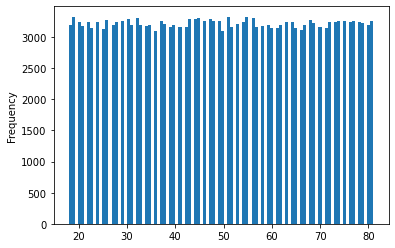

In [81]:
df_cust['age'].plot.hist(bins = 100)

<AxesSubplot:xlabel='age', ylabel='age'>

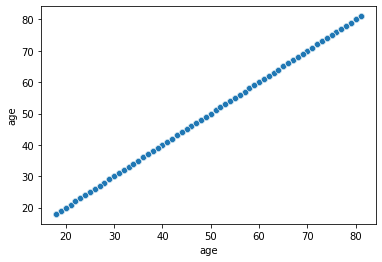

In [82]:
sns.scatterplot(x = 'age', y = 'age',data = df_cust)

In [83]:
# Gender is almost evenly split, too, although that's more believable.

In [84]:
df_cust['gender'].value_counts()

Male      104067
Female    102142
Name: gender, dtype: int64

In [85]:
# Any duplicate customer_id values?  No.

In [86]:
df_cust['customer_id'].duplicated().value_counts()

False    206209
Name: customer_id, dtype: int64

In [87]:
# Any duplicate entries *besides* customer_id?  No.

In [88]:
df_cust_no_customer_id = df_cust.drop(columns = ['customer_id'])

In [89]:
df_cust_no_customer_id.head()

,given_name,family_name,gender,state,age,date_joined,num_dependents,fam_status,income
0,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [90]:
df_cust_no_customer_id[df_cust_no_customer_id.duplicated()]

,given_name,family_name,gender,state,age,date_joined,num_dependents,fam_status,income


In [91]:
# Check for any missing values.

In [92]:
df_cust.isnull().sum()

customer_id           0
given_name        11259
family_name           0
gender                0
state                 0
age                   0
date_joined           0
num_dependents        0
fam_status            0
income                0
dtype: int64

In [93]:
# Maybe some people are old-fashioned and prefer not to give their first name to strangers.
# Let's take a peak to confirm.

In [94]:
df_cust[df_cust['given_name'].isnull() == True]

,customer_id,given_name,family_name,gender,state,age,date_joined,num_dependents,fam_status,income
53,76659,NaN,Gilbert,Male,Colorado,26,1/1/2017,2,married,41709
73,13738,NaN,Frost,Female,Louisiana,39,1/1/2017,0,single,82518
82,89996,NaN,Dawson,Female,Oregon,52,1/1/2017,3,married,117099
99,96166,NaN,Oconnor,Male,Oklahoma,51,1/1/2017,1,married,155673
105,29778,NaN,Dawson,Female,Utah,63,1/1/2017,3,married,151819
...,...,...,...,...,...,...,...,...,...,...
206038,121317,NaN,Melton,Male,Pennsylvania,28,3/31/2020,3,married,87783
206044,200799,NaN,Copeland,Female,Hawaii,52,4/1/2020,2,married,108488
206090,167394,NaN,Frost,Female,Hawaii,61,4/1/2020,1,married,45275
206162,187532,NaN,Floyd,Female,California,39,4/1/2020,0,single,56325


In [95]:
# Check data types.

In [96]:
df_cust.dtypes

customer_id        int64
given_name        object
family_name       object
gender            object
state             object
age                int64
date_joined       object
num_dependents     int64
fam_status        object
income             int64
dtype: object

In [97]:
# Are there any mixed data types?  Yes.

In [98]:
for col in df_cust.columns.tolist():
  weird = (df_cust[[col]].applymap(type) != df_cust[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_cust[weird]) > 0:
    print (col)

given_name


In [99]:
# OK, so make given_name all strings.

In [100]:
df_cust['given_name'] = df_cust['given_name'].astype('str')

In [101]:
# Test for mixed columns again, to be sure.

In [102]:
for col in df_cust.columns.tolist():
  weird = (df_cust[[col]].applymap(type) != df_cust[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_cust[weird]) > 0:
    print (col)

# Combining customer data with the rest of my prepared Instacart data.

## I'll check the shape and the first couple of lines to make sure it looks right.
## Note this has pricing data that was cleaned during the Excercise.

In [103]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02-Data','Prepared-Data', 'ords_prods_merge_derived_columns_cleaned_prices.pkl'))

In [104]:
ords_prods_merge.shape

(32404859, 26)

In [105]:
ords_prods_merge.head(2)

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices,order_id,customer_id,order_number,orders_day_of_week,...,price_range,price_range_loc,busiest_days,busiest_hours,max_order,loyalty_flag,avg_order,spending_flag,avg_order_frequency,frequency_flag
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,...,Mid-range product,Mid-range product,Regularly busy,Busiest hours,32,Regular customer,6.935811,Low spender,9.837838,Frequent customer
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,...,Mid-range product,Mid-range product,Regularly busy,Regularly busy,32,Regular customer,6.935811,Low spender,9.837838,Frequent customer


In [106]:
ords_prods_merge['customer_id'].dtype

dtype('int64')

In [107]:
# Merge the ords_prods_merge dataframe with the new df_cust dataframe, using customer_id as the key.
# I made sure that customer_id is of type 'int64' in both dataframes, above.

In [108]:
cust_ords_prods_merge = ords_prods_merge.merge(df_cust, on = 'customer_id', how = 'outer')

In [109]:
cust_ords_prods_merge.shape

(32404859, 35)

In [110]:
cust_ords_prods_merge.head(1)

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices,order_id,customer_id,order_number,orders_day_of_week,...,frequency_flag,given_name,family_name,gender,state,age,date_joined,num_dependents,fam_status,income
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620


## Export newly-combined customer and order data as a pickle file.

In [111]:
cust_ords_prods_merge.to_pickle(os.path.join(path, '02-Data','Prepared-Data', 'cust_ords_prods_merge.pkl'))